 # Práctica  4.
 ----
  
  Universidad : UTEC \\
  Curso       : Inteligencia Artificial \\
  Profesor    : Cristian López Del Alamo \\
  Tema        : Soft SVM \\
  

 ----

 Nombres y  Apellidos de Integrantes (Añada porcentaje de participación de cada miembro del equipo):
 - Integrante 1: Camila Vela (100%)
 - Integrante 2: Carlos Flores (100%)
 - Integrante 3: Mateo Llallire (100%)
 - Integrante 3: Marcelo Zuloeta (100%)


*Una vez concluya la práctica debe subir el link de su colab a este  [Drive](https://docs.google.com/spreadsheets/d/1XCxGVmf8g29C7RZSPOqxvZHjjRZg45LHWR8mkZOfS1o/edit?usp=sharing)*


# Librerias

In [2]:
import math
import pandas as pd
import numpy as np
# import torch
import matplotlib.pyplot as plt
# import tensorflow as tf


# Base de datos
1. Descarge en su disco esta Base de Datos:
[Download](https://docs.google.com/spreadsheets/d/15-E3kiLJ6bCyXuJvSmxYAp2QYMkPX2QlQ597fAsPYy8/edit?usp=sharing).
2. Para cargar la base de datos de su disco duro utilize el siguiente comando.
from google.colab import files
uploaded = files.upload()
3. Cargamos 70% de los datos para entrenamiento y el resto para testing
4. Solo estamos tomando 2 características, pero usted debe usar métodos de reducción de la dimensionalidad como PCA.


In [4]:
# Base de datos
# from google.colab import files
# uploaded = files.upload()

# Cargando datos
Nombre_Data_Set = 'iris.csv'
iris = pd.read_csv(Nombre_Data_Set)
print(iris)

# Cambiamos todos los setosas a 1 y los demás a -1
iris['label'] = np.where(iris['variety'] == 'Setosa', 1, -1)

# 70% para entrenamiento y el resto para testing
iris_train = iris.sample(frac=0.7)
iris_test = iris[~iris.index.isin(iris_train.index)]

# Solo tomamos 2 características para poder ser visualizado (Noda: En realidad debemos reducir la dimensionalidad por ejemplo con componentes principales)

iris_train_x = iris_train[['sepal.length', 'sepal.width']].to_numpy()
iris_train_y = iris_train['label'].to_numpy()

iris_test_x = iris_test[['sepal.length', 'sepal.width']].to_numpy()
iris_test_y = iris_test['label'].to_numpy()



    sepal.length  sepal.width  petal.length  petal.width  variety
0            5.1          3.5           1.4          0.2        1
1            4.9          3.0           1.4          0.2        1
2            4.7          3.2           1.3          0.2        1
3            4.6          3.1           1.5          0.2        1
4            5.0          3.6           1.4          0.2        1
..           ...          ...           ...          ...      ...
95           5.7          3.0           4.2          1.2       -1
96           5.7          2.9           4.2          1.3       -1
97           6.2          2.9           4.3          1.3       -1
98           5.1          2.5           3.0          1.1       -1
99           5.7          2.8           4.1          1.3       -1

[100 rows x 5 columns]


# **Soft SVM**

- Implementar todas las funciones para que este código sea funcional

In [5]:
def loss(y, X, w, bias, C):
    # Compute the Hinge Loss for each sample
    hinge_loss = 1 - y * (np.dot(X, w) + bias)
    hinge_loss[hinge_loss < 0] = 0  # max(0, hinge_loss)

    # Promedio
    avg_hinge_loss = np.mean(hinge_loss)

    # Añadiendo el termino regularizador
    total_loss = avg_hinge_loss + C * np.dot(w, w)

    return total_loss

In [6]:
def grad(y, X, w, bias, C):

    # Inicializando gradientes
    dw = np.zeros(w.shape)
    db = 0

    N = len(y)

    # Calculando la distancia (hinge loss components) for each sample
    distances = 1 - y * (np.dot(X, w) + bias)

    for i in range(N):
        if max(0, distances[i]) == 0:  # Correctly
            di = w
        else:  # Misclassified
            di = w - C * y[i] * X[i]

        dw += di

    # Promediando las gradientes
    dw = dw / N
    db = -C * np.sum(y[distances >= 1])

    return dw, db

In [7]:
def update(w, b, grad, alpha):
  # Actualizando parametros
  dw, db = grad
  w_new = w - alpha * dw
  b_new = b - alpha *db
  return w_new, b_new

# Entrenamiento

In [8]:
def train(x,y,num_epochs,c=10, alpha=0.00001):
  w = np.random.rand(iris_train_x.shape[1])
  b = np.random.random()

  loss_function = []
  step = num_epochs//10
  for epoch in range(num_epochs):
    loss_value = loss(iris_train_y, iris_train_x, w, b, c)
    loss_function.append(loss_value)
    if epoch % step == 0:
      print(f'Epoch {epoch}, loss {loss_value}')
    for idx, x_i in enumerate(iris_train_x):
      grad_values = grad(iris_train_y[idx], x_i, w, b, c)
      w, b = update(w, b, grad_values, alpha)
  return w,b

  plt.plot(range(num_epochs), loss_function, label='Función de pérdida')
  plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

In [9]:
def train(X, y, epochs=1000, learning_rate=0.01, C=1.0):
    w = np.zeros(X.shape[1])  # Initialize weights
    b = 0  # Initialize bias

    for epoch in range(epochs):
        # Compute loss and gradients
        loss_value = loss(y, X, w, b, C)
        dw, db = grad(y, X, w, b, C)

        # Update weights and bias
        w, b = update(w, b, (dw, db), learning_rate)

    return w, b

In [16]:
def h(x, w, b):
    return np.dot(x, w) + b

# Funciones par graficar

In [17]:
def plane_intersect(a, b):
    a_vec, b_vec = np.array(a[:3]), np.array(b[:3])
    aXb_vec = np.cross(a_vec, b_vec)
    A = np.array([a_vec, b_vec, aXb_vec])
    d = np.array([-a[3], -b[3], 0.]).reshape(3,1)
    p_inter = np.linalg.solve(A, d).T
    return p_inter[0], (p_inter + aXb_vec)[0]

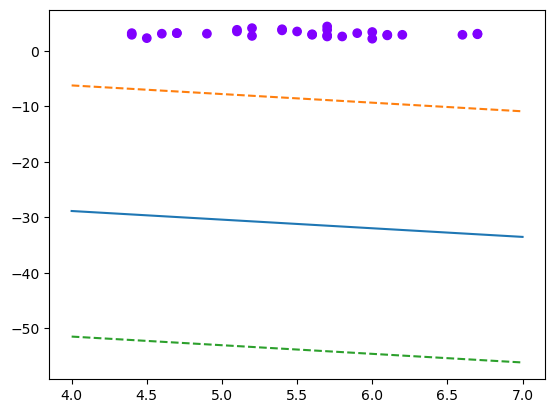

In [18]:
import matplotlib.cm as cm
w,b = train(iris_train_x,iris_train_y,1000)
iris_y_ = h(iris_test_x, w, b)
iris_y_pred = np.sign(iris_y_)

x_1, x_2 = plane_intersect(list(w)+[0,b], [0,0,1,0])
m = (x_2[1]-x_1[1])/(x_2[0]-x_1[0])
c = -m*x_1[0] + x_1[1]

d = 1/np.linalg.norm(w)
c_p = -m*(x_1[0] + d*math.sqrt(1/(1+m**2))) + x_1[1] + m*d*math.sqrt(1/(1+m**2))

plt.plot(range(4,8), [m*x_i + c for x_i in range(4,8)])
plt.plot(range(4,8), [m*x_i + c - c_p for x_i in range(4,8)], '--')
plt.plot(range(4,8), [m*x_i + c + c_p for x_i in range(4,8)], '--')
plt.scatter(iris_test_x[:,0], iris_test_x[:,1], color=cm.rainbow(iris_y_pred + 1))

In [15]:
def h(test,w,b): # definir el hiperplano
    return np.dot(test,w) + b